In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

You are expected to perform the statistical analysis to answer the following questions: <br>

1. Explore the dataset and extract insights using Exploratory Data Analysis. <br>
2. Do the users spend more time on the new landing page than the old landing page? <br>
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? <br>
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function] <br>
5. Is the mean time spent on the new page same for the different language users? <br>
*Consider a significance level of 0.05 for all tests.

In [10]:
# loading the data and preview
abtest = pd.read_csv('C:\\Users\\KXS26XY\\OneDrive - The Home Depot\\Desktop\\Data Science and Business Analytics\\abtest.csv')
abtest.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


# Data background and contents

In [11]:
# Checking the number of rows and columns in the dataset
abtest.shape

(100, 6)

In [12]:
# Checking the data type of each column
abtest.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

In [13]:
# Checking if any of the numeric values are null
abtest.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

# Univariate Analysis

In [14]:
# Understanding the mean, min, max etc. of the time_spent_on_the_page column
# Need to look at the mean by page instead of it as a whole
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [15]:
# abtest[abtest['landing_page'] == 'new'].count()
abtest[abtest['landing_page'] == 'old'].count()

user_id                   50
group                     50
landing_page              50
time_spent_on_the_page    50
converted                 50
language_preferred        50
dtype: int64

In [16]:
# Mean calculation- sample means
abtest['time_spent_on_the_page'].groupby(abtest['landing_page']).mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [17]:
# Std deviation calculation- sample standard deviation
abtest['time_spent_on_the_page'].groupby(abtest['landing_page']).std()

landing_page
new    1.817031
old    2.581975
Name: time_spent_on_the_page, dtype: float64

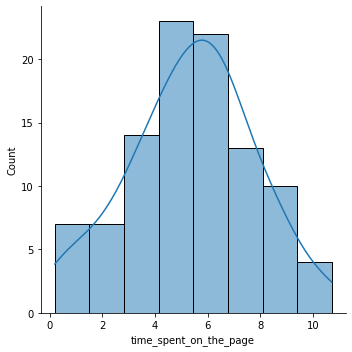

In [18]:
sns.displot(abtest['time_spent_on_the_page'], kde=True);

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


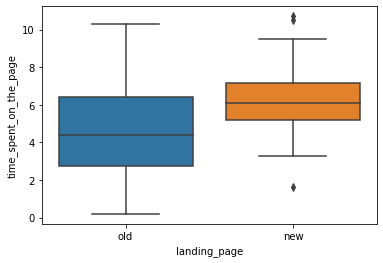

In [19]:
sns.boxplot(abtest['landing_page'], abtest['time_spent_on_the_page']);

The mean time spent on the new page is higher than the mean time spent on the old page

C:\Users\KXS26XY\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


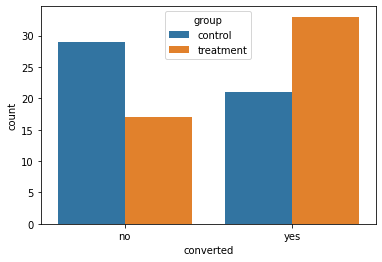

In [20]:
sns.countplot(abtest['converted'], hue = abtest['group']);

The number of conversions (yes) is greater in the treatment group <br>
The number of non-conversions (no) is greater in the control group

# Bivariate Analysis

In [21]:
abtest.cov()

,user_id,time_spent_on_the_page
user_id,2734.848485,-46.372828
time_spent_on_the_page,-46.372828,5.655674


In [22]:
abtest.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


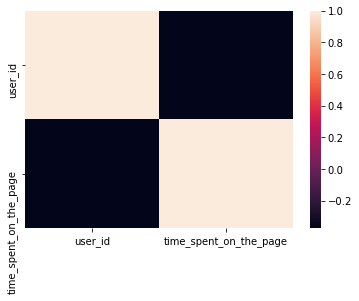

In [23]:
sns.heatmap(abtest.corr());

# 1. Do the users spend more time on the new landing page than the old landing page?

Are the assumptions of the T test satisfied? <br>
The control and treatment groups are independent of each other <br>
The time spent on the landing page is a continuous variable  <br>
Sample std deviations are different- therefore population std deviations are unknown <br>
Sample size > 30 <br>
5% significance interval <br>
Test for comparing means (unknown variance) - T test

mu1 = population mean of control group <br>
mu2 = population mean of treatment group <br>
Old Landing Page = Control <br>
New Landing Page = Treatment <br>

Null hypothesis: mu1 = mu2 <br>
Alternate hypothesis: mu1 < mu2

In [24]:
abtest['time_spent_on_the_page'].groupby(abtest['landing_page']).mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [7]:
# Creating two new datasets- one with data on the new and one on the old landing page
abtest_treatment = abtest[abtest['landing_page'] == 'new']
abtest_treatment

abtest_control = abtest[abtest['landing_page'] == 'old']
abtest_control.head(5)



,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [27]:
from scipy.stats import ttest_ind

test_stat, p_val = ttest_ind(abtest_control['time_spent_on_the_page'], abtest_treatment['time_spent_on_the_page'], equal_var = False, alternative = 'less')
print(test_stat,p_val)

-3.7867702694199856 0.0001392381225166549


p_value is less than 0.05 -- Reject the Null Hypothesis <br>
Hence, there is enough evidence to say that the users spend more time on the new landing page than the old page

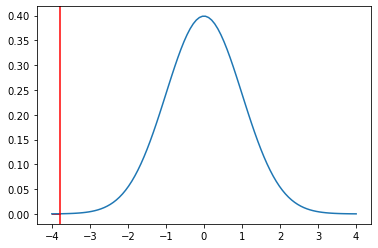

In [33]:
from scipy.stats import norm
x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, -4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.show()

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 


In [35]:
abtest.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [36]:
conv_control = (abtest['user_id'][abtest['landing_page'] == 'old'][abtest['converted'] == 'yes'].count())
conv_treatment = (abtest['user_id'][abtest['landing_page'] == 'new'][abtest['converted'] == 'yes'].count())

print(conv_control, conv_treatment)
# 2 proportion Z test?

21 33


Are the assumptions of the 2 proportion Z test satisfied? <br>
Binomially distributed - yes the task either gets converted or does not <br>
Independent populations - yes <br>
np and n(1-p) are greater than 10 -yes <br>
Test for two proportions - Z test

p1 = proportion of conversion for control group <br>
p2 = proportion of conversion for treatment group <br>
Null Hypothesis: p1 = p2 <br>
Alternate Hypothesis: p1 <> p2 <br>

In [37]:
abtest.groupby(abtest['landing_page']).count()
n1 = 50
n2 = 50
p1 = conv_control
p2 = conv_treatment

from statsmodels.stats.proportion import proportions_ztest

# setting the count of conversions
conv = np.array([p1, p2])
nobs = np.array([50,50])
test_stat, p_val = proportions_ztest(conv, nobs)
print(test_stat,p_val)


-2.4077170617153842 0.016052616408112556


p_value is greater than 0.05 -- Fail to reject the Null Hypothesis <br>
Hence, we do not have enough evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page

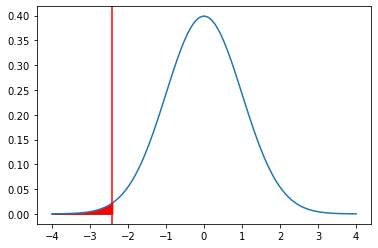

In [38]:
from scipy.stats import norm
x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, -4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.show()

# Does the converted status depend on the preferred language?
[Hint: Create a contingency table using the pandas.crosstab() function] 

In [45]:
abtest_contingency = pd.crosstab(abtest['converted'], abtest['language_preferred'])
abtest_contingency

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


Chi-squared test for Independence

Null Hypothesis: Converted status and Language preferred are independent <br>
Alternate Hypothesis: Converted status and Language preferred are not independent

Are the assumptions of the Chi-squared test satisfied? <br>
Categorical variables - yes <br>
Number of sample observations in each level is at least 5 - yes <br>
Random sampling from population <br>
Chi-squared test for Independence

In [46]:
from scipy.stats import chi2_contingency

chi, p_val, dof, expected = chi2_contingency(abtest_contingency)
print(chi,p_val)

3.0930306905370837 0.21298887487543447


p_value is large -- Fail to reject the Null Hypothesis <br>
Hence, the converted status and the preferred language are independent

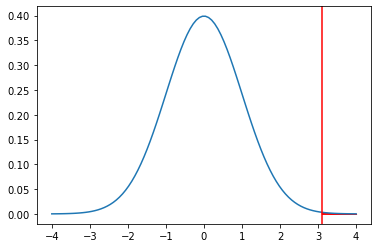

In [48]:
from scipy.stats import norm
x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = chi, c = 'r')
x1 = np.linspace(chi, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.show()

# Is the mean time spent on the new page same for the different language users?

Comparing means of 3 samples- Anova

In [39]:
abtest['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

mu1 = mean time spent on new page, language = Spanish <br>
mu2 = mean time spent on new page, language = English <br>
mu3 = mean time spent on new page, language = French <br>

Response- mean time spent on new page
Factor- the preferred languages

Null Hypothesis: mu1 = mu2 = mu3 <br>
Alternate Hypothesis: atleast one of the means is not the same


Are the assumptions of the Anova test satisfied? <br>
Normally distributed - Yes <br>
Samples are independent - Yes <br>
Population variances are equal (Assumption) <br>
One Way Anova F Test

Performing the Shapiro-Wilks test to check for Normality <br>
Null Hypothesis: Time spent on new page follows a normal distribution <br>
Alternate Hypothesis: Time spent on new page does not follow a normal distribution

In [40]:
from scipy import stats
w, p_val = stats.shapiro(abtest['time_spent_on_the_page'][abtest['landing_page'] == 'new'])
p_val

0.8040016293525696

p_value is very large -- Fail to reject the Null Hypothesis <br>
Hence, assumption of normality is ok

Performing the Levene's Test to check for equality of population variances <br>
Null Hypothesis: All population variances are equal <br>
Alternate Hypothesis: At least one variance is different from the rest


In [41]:
from scipy.stats import levene
test_stat, p_val = levene(abtest['time_spent_on_the_page'][abtest['landing_page'] == 'new'][abtest['language_preferred'] == 'Spanish'],
                          abtest['time_spent_on_the_page'][abtest['landing_page'] == 'new'][abtest['language_preferred'] == 'English'],
                          abtest['time_spent_on_the_page'][abtest['landing_page'] == 'new'][abtest['language_preferred'] == 'French']
                         )

p_val

0.46711357711340173

p_val is large -- Fail to reject the Null Hypothesis <br>
Hence, assumption of equal variances is ok

In [43]:
abtest_anova = abtest[abtest['landing_page'] == 'new']
abtest_anova

from scipy.stats import f_oneway
test_stat, p_val = f_oneway(abtest.loc[abtest['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                           abtest.loc[abtest['language_preferred'] == 'English', 'time_spent_on_the_page'],
                           abtest.loc[abtest['language_preferred'] == 'French', 'time_spent_on_the_page'])

print(test_stat,p_val)

0.1434343922124043 0.8665610536012648


p_value is too large -- Fail to reject the Null Hypothesis <br>
Hence, there is not enough evidence to say that the population means are different from one another

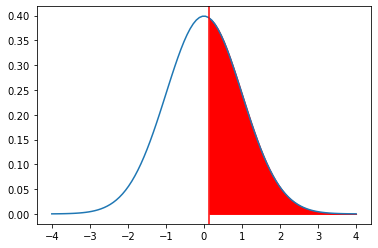

In [49]:
from scipy.stats import norm
x = np.linspace(-4,4,100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.show()